In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

In [4]:
data = pd.read_csv("FuelConsumptionCo2.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
cdf = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


In [5]:
cdf.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,11.580881,256.228679
std,1.415895,1.797447,3.485595,63.372304
min,1.000000,3.000000,4.700000,108.000000
25%,2.000000,4.000000,9.000000,207.000000
50%,3.400000,6.000000,10.900000,251.000000
75%,4.300000,8.000000,13.350000,294.000000
max,8.400000,12.000000,25.800000,488.000000


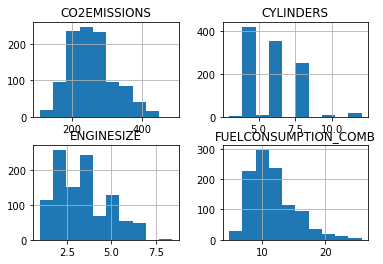

In [6]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

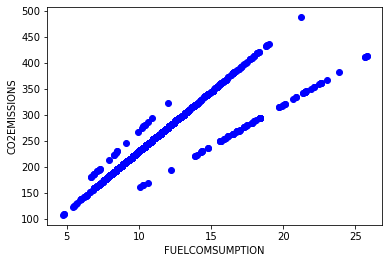

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color ='blue')
plt.xlabel('FUELCOMSUMPTION')
plt.ylabel('CO2EMISSIONS')
plt.show()

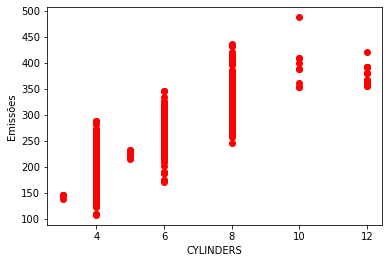

In [9]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color='red')
plt.xlabel('CYLINDERS')
plt.ylabel('Emissões')
plt.show()

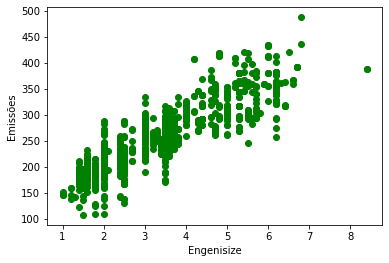

In [13]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='green')
plt.xlabel('Engenisize')
plt.ylabel('Emissões')
plt.show()

In [7]:
msk = np.random.rand(len(data))<0.8

In [8]:
train=cdf[msk]
test=cdf[~msk]

In [9]:
train.shape

(833, 4)

In [10]:
test.shape

(234, 4)

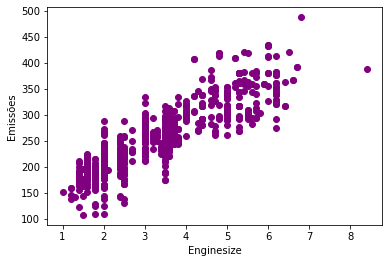

In [11]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='purple')
plt.xlabel('Enginesize')
plt.ylabel('Emissões')
plt.show()

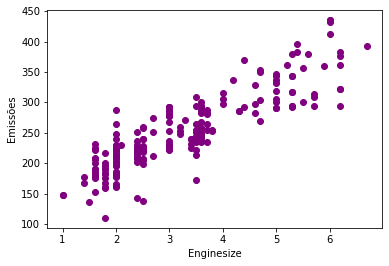

In [26]:
plt.scatter(test.ENGINESIZE,test.CO2EMISSIONS,color='purple')
plt.xlabel('Enginesize')
plt.ylabel('Emissões')
plt.show()

In [13]:
from sklearn import linear_model

reg= linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [[40.12910063]]
Intercept:  [122.4667771]


Text(0, 0.5, 'Emissões')

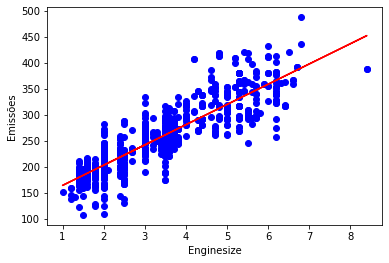

In [36]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,Color= 'blue')
plt.plot(train_x,reg.coef_[0][0]*train_x+reg.intercept_[0],'r')
plt.xlabel('Enginesize')
plt.ylabel('Emissões')

In [37]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = reg.predict(test_x)


In [38]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 23.08
Residual sum of squares (MSE): 883.42
R2-score: 0.69
